# Decision Tree Implementation

### Installations

This section will download everything needed to implement and run the code on the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# fetch datasets
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
parkinsons = fetch_ucirepo(id=174) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

Implementation

In [2]:

def train_evaluate_model(X, y, test_size, split_name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n {split_name} Split (Train: {100-test_size*100}% Test: {test_size*100}%)")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {split_name} Split')
    plt.show()
    
    return accuracy

splits = {
    "70-30": 0.3,
    "80-20": 0.2,
    "50-50": 0.5
}


### Dataset 1: Diabetes


 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     65605
           1       0.29      0.33      0.31     10499

    accuracy                           0.80     76104
   macro avg       0.59      0.60      0.60     76104
weighted avg       0.81      0.80      0.80     76104



<Figure size 800x600 with 0 Axes>

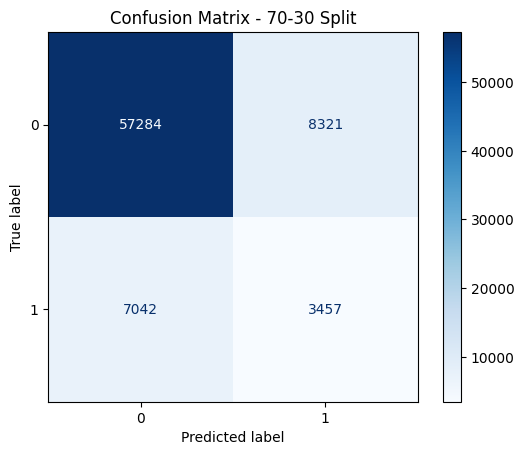


 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     43739
           1       0.30      0.33      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



<Figure size 800x600 with 0 Axes>

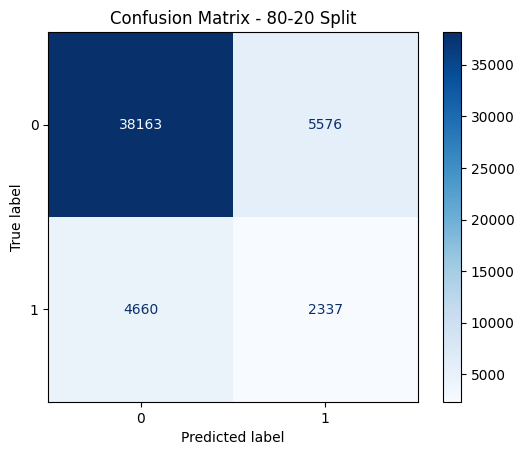


 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88    109241
           1       0.29      0.33      0.31     17599

    accuracy                           0.80    126840
   macro avg       0.59      0.60      0.60    126840
weighted avg       0.81      0.80      0.80    126840



<Figure size 800x600 with 0 Axes>

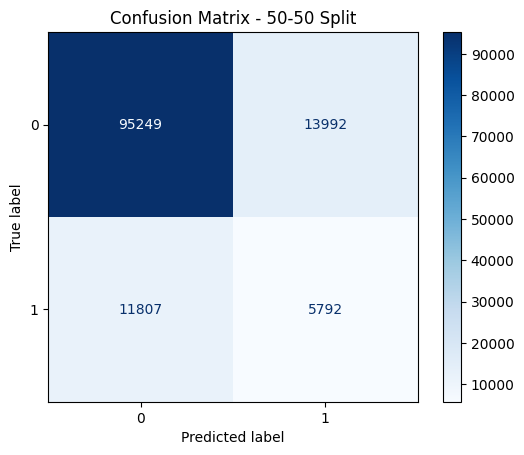


 Summary of Results
70-30 split accuracy: 0.80
80-20 split accuracy: 0.80
50-50 split accuracy: 0.80
Average Accuracy: 0.80


In [3]:
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name)
    results[split_name] = accuracy

# Print comparison

avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")

### Dataset 2: Rice (Cammeo and Osmancik)


 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.89      0.84      0.87       518
    Osmancik       0.87      0.92      0.89       625

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143



<Figure size 800x600 with 0 Axes>

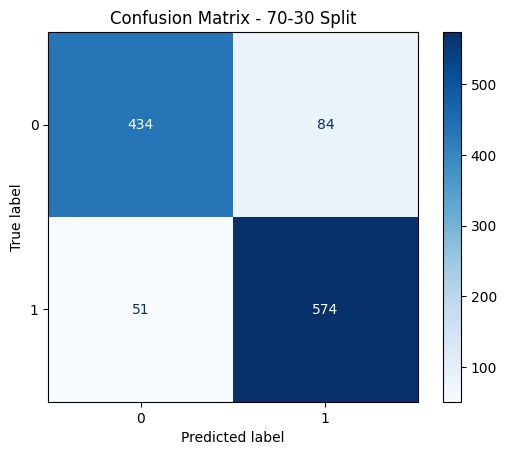


 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.88      0.85      0.87       350
    Osmancik       0.88      0.90      0.89       412

    accuracy                           0.88       762
   macro avg       0.88      0.88      0.88       762
weighted avg       0.88      0.88      0.88       762



<Figure size 800x600 with 0 Axes>

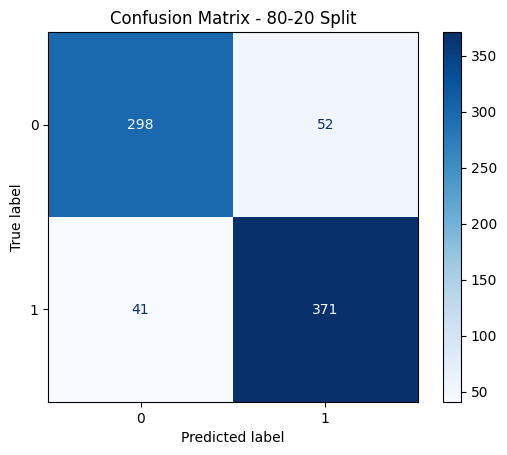


 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.88      0.83      0.85       831
    Osmancik       0.87      0.91      0.89      1074

    accuracy                           0.87      1905
   macro avg       0.88      0.87      0.87      1905
weighted avg       0.87      0.87      0.87      1905



<Figure size 800x600 with 0 Axes>

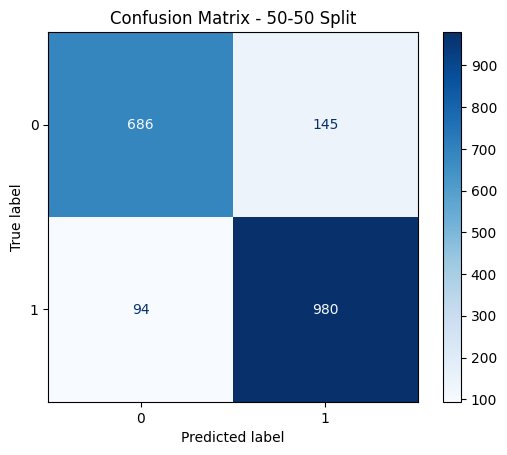


 Summary of Results
70-30 split accuracy: 0.88
80-20 split accuracy: 0.88
50-50 split accuracy: 0.87
Average Accuracy: 0.88


In [4]:
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")


 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59



<Figure size 800x600 with 0 Axes>

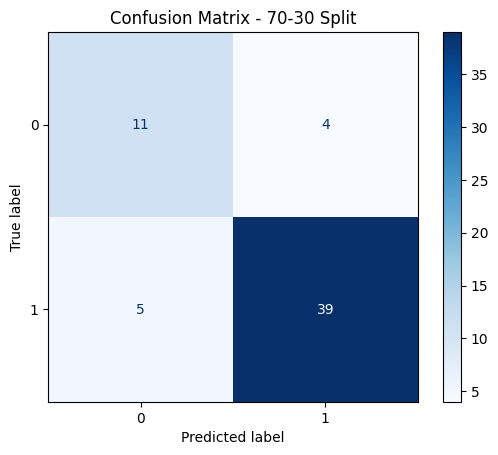


 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



<Figure size 800x600 with 0 Axes>

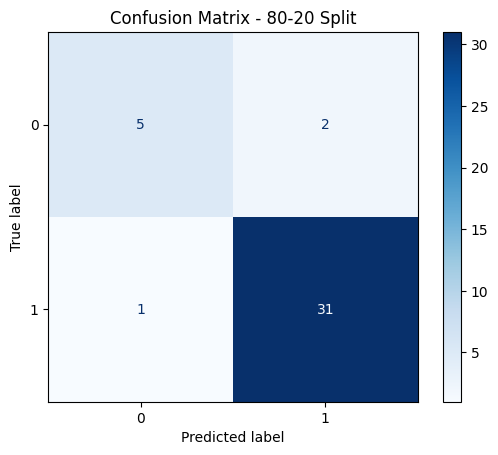


 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.91      0.92      0.91        75

    accuracy                           0.87        98
   macro avg       0.82      0.81      0.81        98
weighted avg       0.87      0.87      0.87        98



<Figure size 800x600 with 0 Axes>

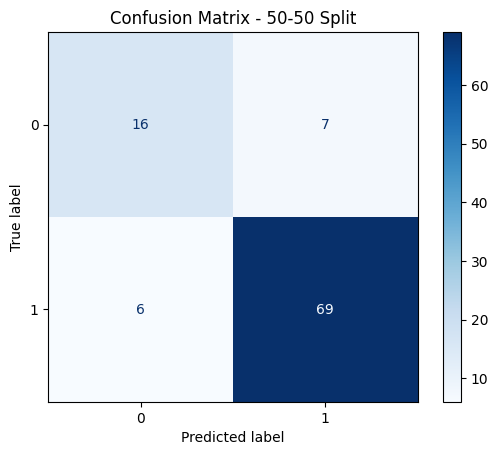


 Summary of Results
70-30 split accuracy: 0.85
80-20 split accuracy: 0.92
50-50 split accuracy: 0.87
Average Accuracy: 0.88


: 

In [ ]:
# data (as pandas dataframes) 
X = parkinsons.data.features 
y = parkinsons.data.targets 
  
results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results.items())

print(f"Average Accuracy: {avg_acc:.2f}")
